In [1]:
from google.colab import drive
drive.mount("/gdirve")
%cd /gdirve

Mounted at /gdirve
/gdirve


### Kütüphane kurulumları

In [2]:
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt


Veri kümesini oluşturmak ve ayırmak

In [3]:
(x_train, _),(x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

In [5]:
print("Eğitim ",x_train.shape)
print("Test",x_test.shape)

Eğitim  (60000, 28, 28, 1)
Test (10000, 28, 28, 1)


### Veriye Gürültü Ekleme Adımı

In [6]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor* np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor* np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)


Gürültülü Veriyi Görselleştirme

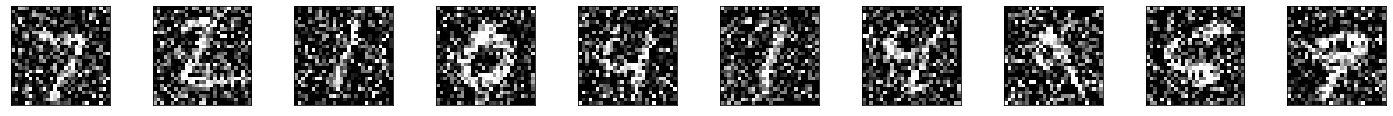

In [7]:
%matplotlib inline

n = 10
plt.figure(figsize=(25,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## ENCODE Modeli

In [8]:
input_img = Input(shape=(28,28,1))

x = Conv2D(32,(3,3),activation="relu",padding="same")(input_img)

x = MaxPooling2D((2,2),padding="same")(x)

x = Conv2D(32,(3,3),activation="relu",padding="same")(x)

encoded = MaxPooling2D((2,2),padding="same")(x)

# (7,7,32)

## DECODE Modeli

In [9]:
x = Conv2D(32,(3,3),activation="relu",padding="same")(encoded)

x = UpSampling2D((2,2))(x)

x = Conv2D(32,(3,3),activation="relu",padding="same")(x)

x = UpSampling2D((2,2))(x)

decoded = Conv2D(1,(3,3),activation="relu",padding="same")(x)


## Modelin Derlenmesi ve Eğitilmesi

In [10]:
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer="adadelta",loss="binary_crossentropy")

In [18]:
autoencoder.fit(x_train_noisy,x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy,x_test),
                callbacks=[TensorBoard(log_dir="/tmp/tb", histogram_freq=0,write_graph=False)])
decoded_imgs = autoencoder.predict(x_test)

Epoch 1/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2574 - val_loss: 0.2566
Epoch 2/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2529 - val_loss: 0.2502
Epoch 3/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2461 - val_loss: 0.2445
Epoch 4/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2421 - val_loss: 0.2410
Epoch 5/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2382 - val_loss: 0.2367
Epoch 6/100
469/469 [==============================] - 6s 14ms/step - loss: 0.2337 - val_loss: 0.2325
Epoch 7/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2307 - val_loss: 0.2294
Epoch 8/100
469/469 [==============================] - 6s 14ms/step - loss: 0.2271 - val_loss: 0.2254
Epoch 9/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2227 - val_loss: 0.2209
Epoch 10/100
469/469 [==============================] - 6s 14ms/step - loss: 0.218

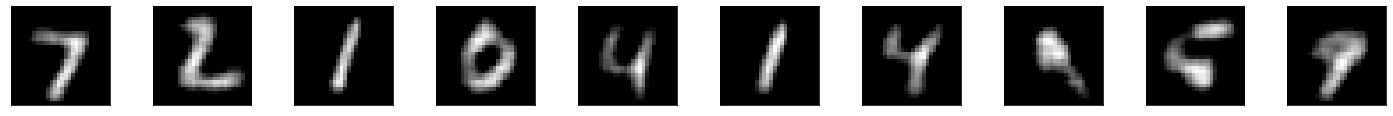

In [19]:
%matplotlib inline
n = 10
plt.figure(figsize=(25,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()